## Adrián Gayo
## Iñaki del Campo
### Carga de datos y análisis exploratorio

#### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

StatementMeta(mysparkpractica, 4, 2, Finished, Available)

#### Carga de datos

In [2]:
%%pyspark
df = spark.read.options(delimiter=",", header=True).csv('abfss://labs@datalakelabs2.dfs.core.windows.net/data/water_quality.csv')
display(df.limit(10))

StatementMeta(mysparkpractica, 4, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, 15a1c1c3-a559-401b-9244-d20cd5bb7fb1)

In [3]:
df = df.toPandas()
df.info()

StatementMeta(mysparkpractica, 4, 4, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ph               2785 non-null   object
 1   Hardness         3276 non-null   object
 2   Solids           3276 non-null   object
 3   Chloramines      3276 non-null   object
 4   Sulfate          2495 non-null   object
 5   Conductivity     3276 non-null   object
 6   Organic_carbon   3276 non-null   object
 7   Trihalomethanes  3114 non-null   object
 8   Turbidity        3276 non-null   object
 9   Potability       3276 non-null   object
dtypes: object(10)
memory usage: 256.1+ KB


#### Convertimos los datos.

In [4]:
# Convertimos la columna 'Potability' a tipo entero y el resto de columnas a tipo flotante.
df = df.astype(float)
df['Potability'] = df['Potability'].astype(int)

# Cambiamos los valores de la columna 'Potability' a 'Potable' y 'Not Potable'.
df['Potability'] = df['Potability'].replace({0: 'No Potable', 1: 'Potable'})

df

StatementMeta(mysparkpractica, 4, 5, Finished, Available)

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135  No Potable  
1       592.885359       15.180013        56.329076   4.500656  No Potable  
2       418.606213       16.868637        66.420093   3.055934  No Potable  
3       363.266516       18.436524       100.341674   4.628771  No Potable  
4       398.410813       11.558279        31.997993   4.075075  No Potable  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821     Potable  
3272    392.449580       19.903225              NaN   2.798243     Potable  
3273    432.044783       11.039070        69.845400   3.298875     Potable  
3274    402.883113       11.168946        77.488213   4.708658     Potable  
3275    327.459760       16.140368        78.698446   2.309149     Potable  

[3276 rows x 10 columns]

In [5]:
df.head()

StatementMeta(mysparkpractica, 4, 6, Finished, Available)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135  No Potable  
1       15.180013        56.329076   4.500656  No Potable  
2       16.868637        66.420093   3.055934  No Potable  
3       18.436524       100.341674   4.628771  No Potable  
4       11.558279        31.997993   4.075075  No Potable

In [6]:
df.describe()

StatementMeta(mysparkpractica, 4, 7, Finished, Available)

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3114.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786  
std       80.824064        3.308162        16.175008     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        55.844536     3.439711  
50%      421.884968       14.218338        66.622485     3.955028  
75%      481.792304       16.557652        77.337473     4.500320  
max      753.342620       28.300000       124.000000     6.739000

In [7]:
print(f'El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas.')

StatementMeta(mysparkpractica, 4, 8, Finished, Available)

El dataframe tiene 3276 filas y 10 columnas.


#### Analizamos si es un problema balanceado

StatementMeta(mysparkpractica, 4, 9, Finished, Available)

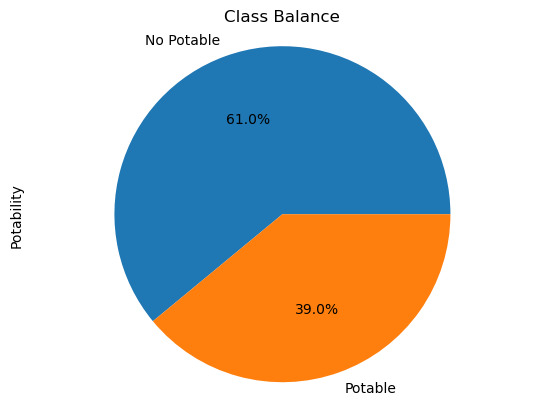

In [8]:
df['Potability'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class Balance')
plt.show()

Observamos que la clase de agua no potable tiene un mayor número de instancias. El porcentaje no es demasiado alto y el problema podría considerarse como balanceado, de todas formas en la parte de machine learning será interesante optar por métricas como F1-score.

#### Tratamos los missing values

In [9]:
# Analiza los missing values.
df.isnull().sum()

StatementMeta(mysparkpractica, 4, 10, Finished, Available)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
# Elimina los missing values.
df = df.dropna()
df.shape

StatementMeta(mysparkpractica, 4, 11, Finished, Available)

(2011, 10)

Elegimos eliminar los valores faltantes pese a perder un tercio de nuestros datos. Consideramos que otras soluciones como la media pueden incluir demasiado ruido en nuestro conjunto de datos final.

StatementMeta(mysparkpractica, 4, 12, Finished, Available)

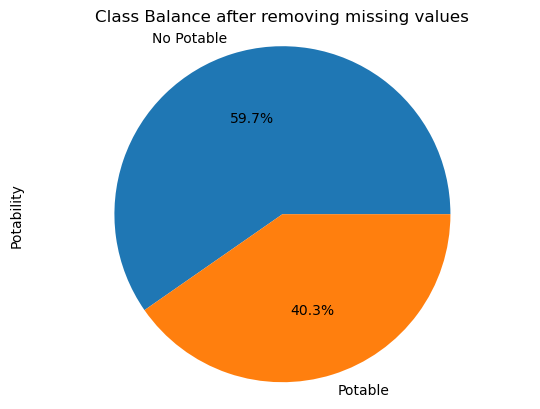

In [11]:
# Analiza nuevamente la distribución de las clases.
df['Potability'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class Balance after removing missing values')
plt.show()

La distribución de las etiquetas es algo más balanceada al eliminar los missing values, sin embargo, se mantiene muy similar.

#### EDA

StatementMeta(mysparkpractica, 4, 13, Finished, Available)

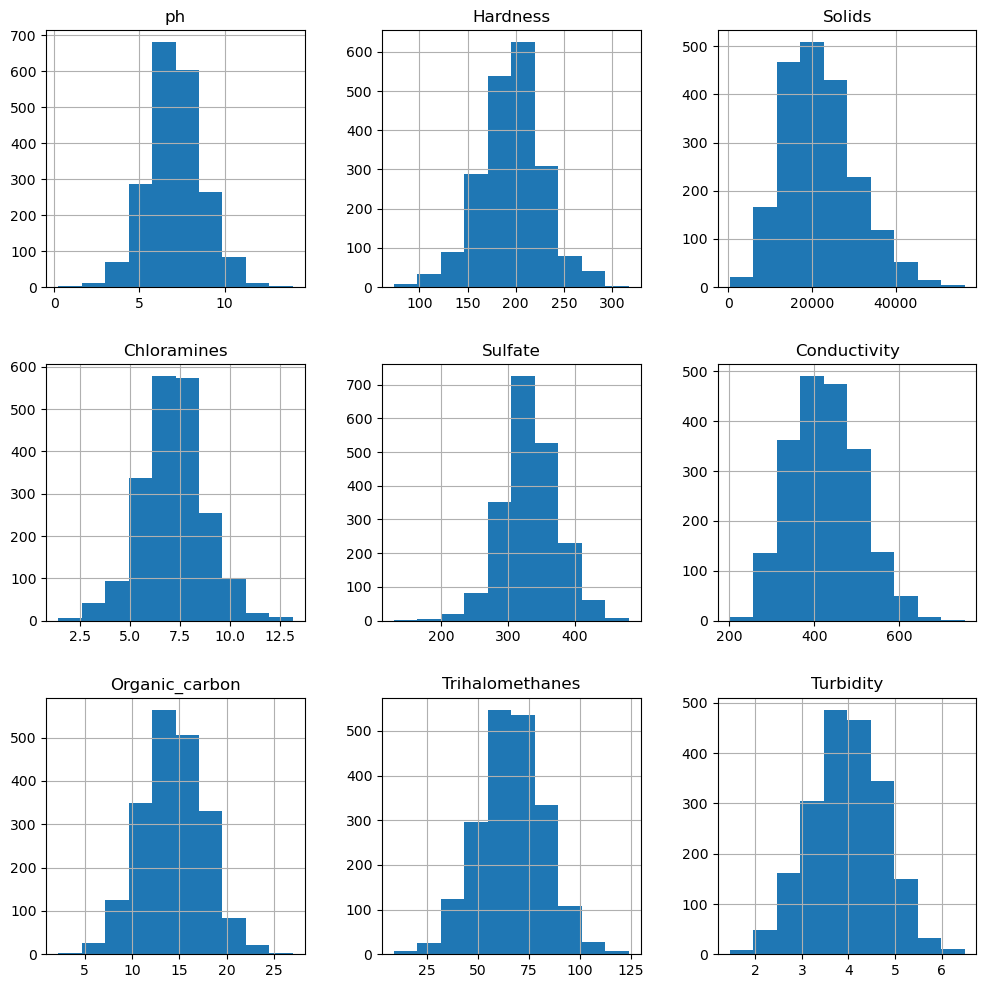

In [12]:
# Analizamos la distribución de las variables.
df.hist(figsize=(12, 12))
plt.show()

Todas nuestras variables siguen una distribución normal.

StatementMeta(mysparkpractica, 4, 14, Finished, Available)

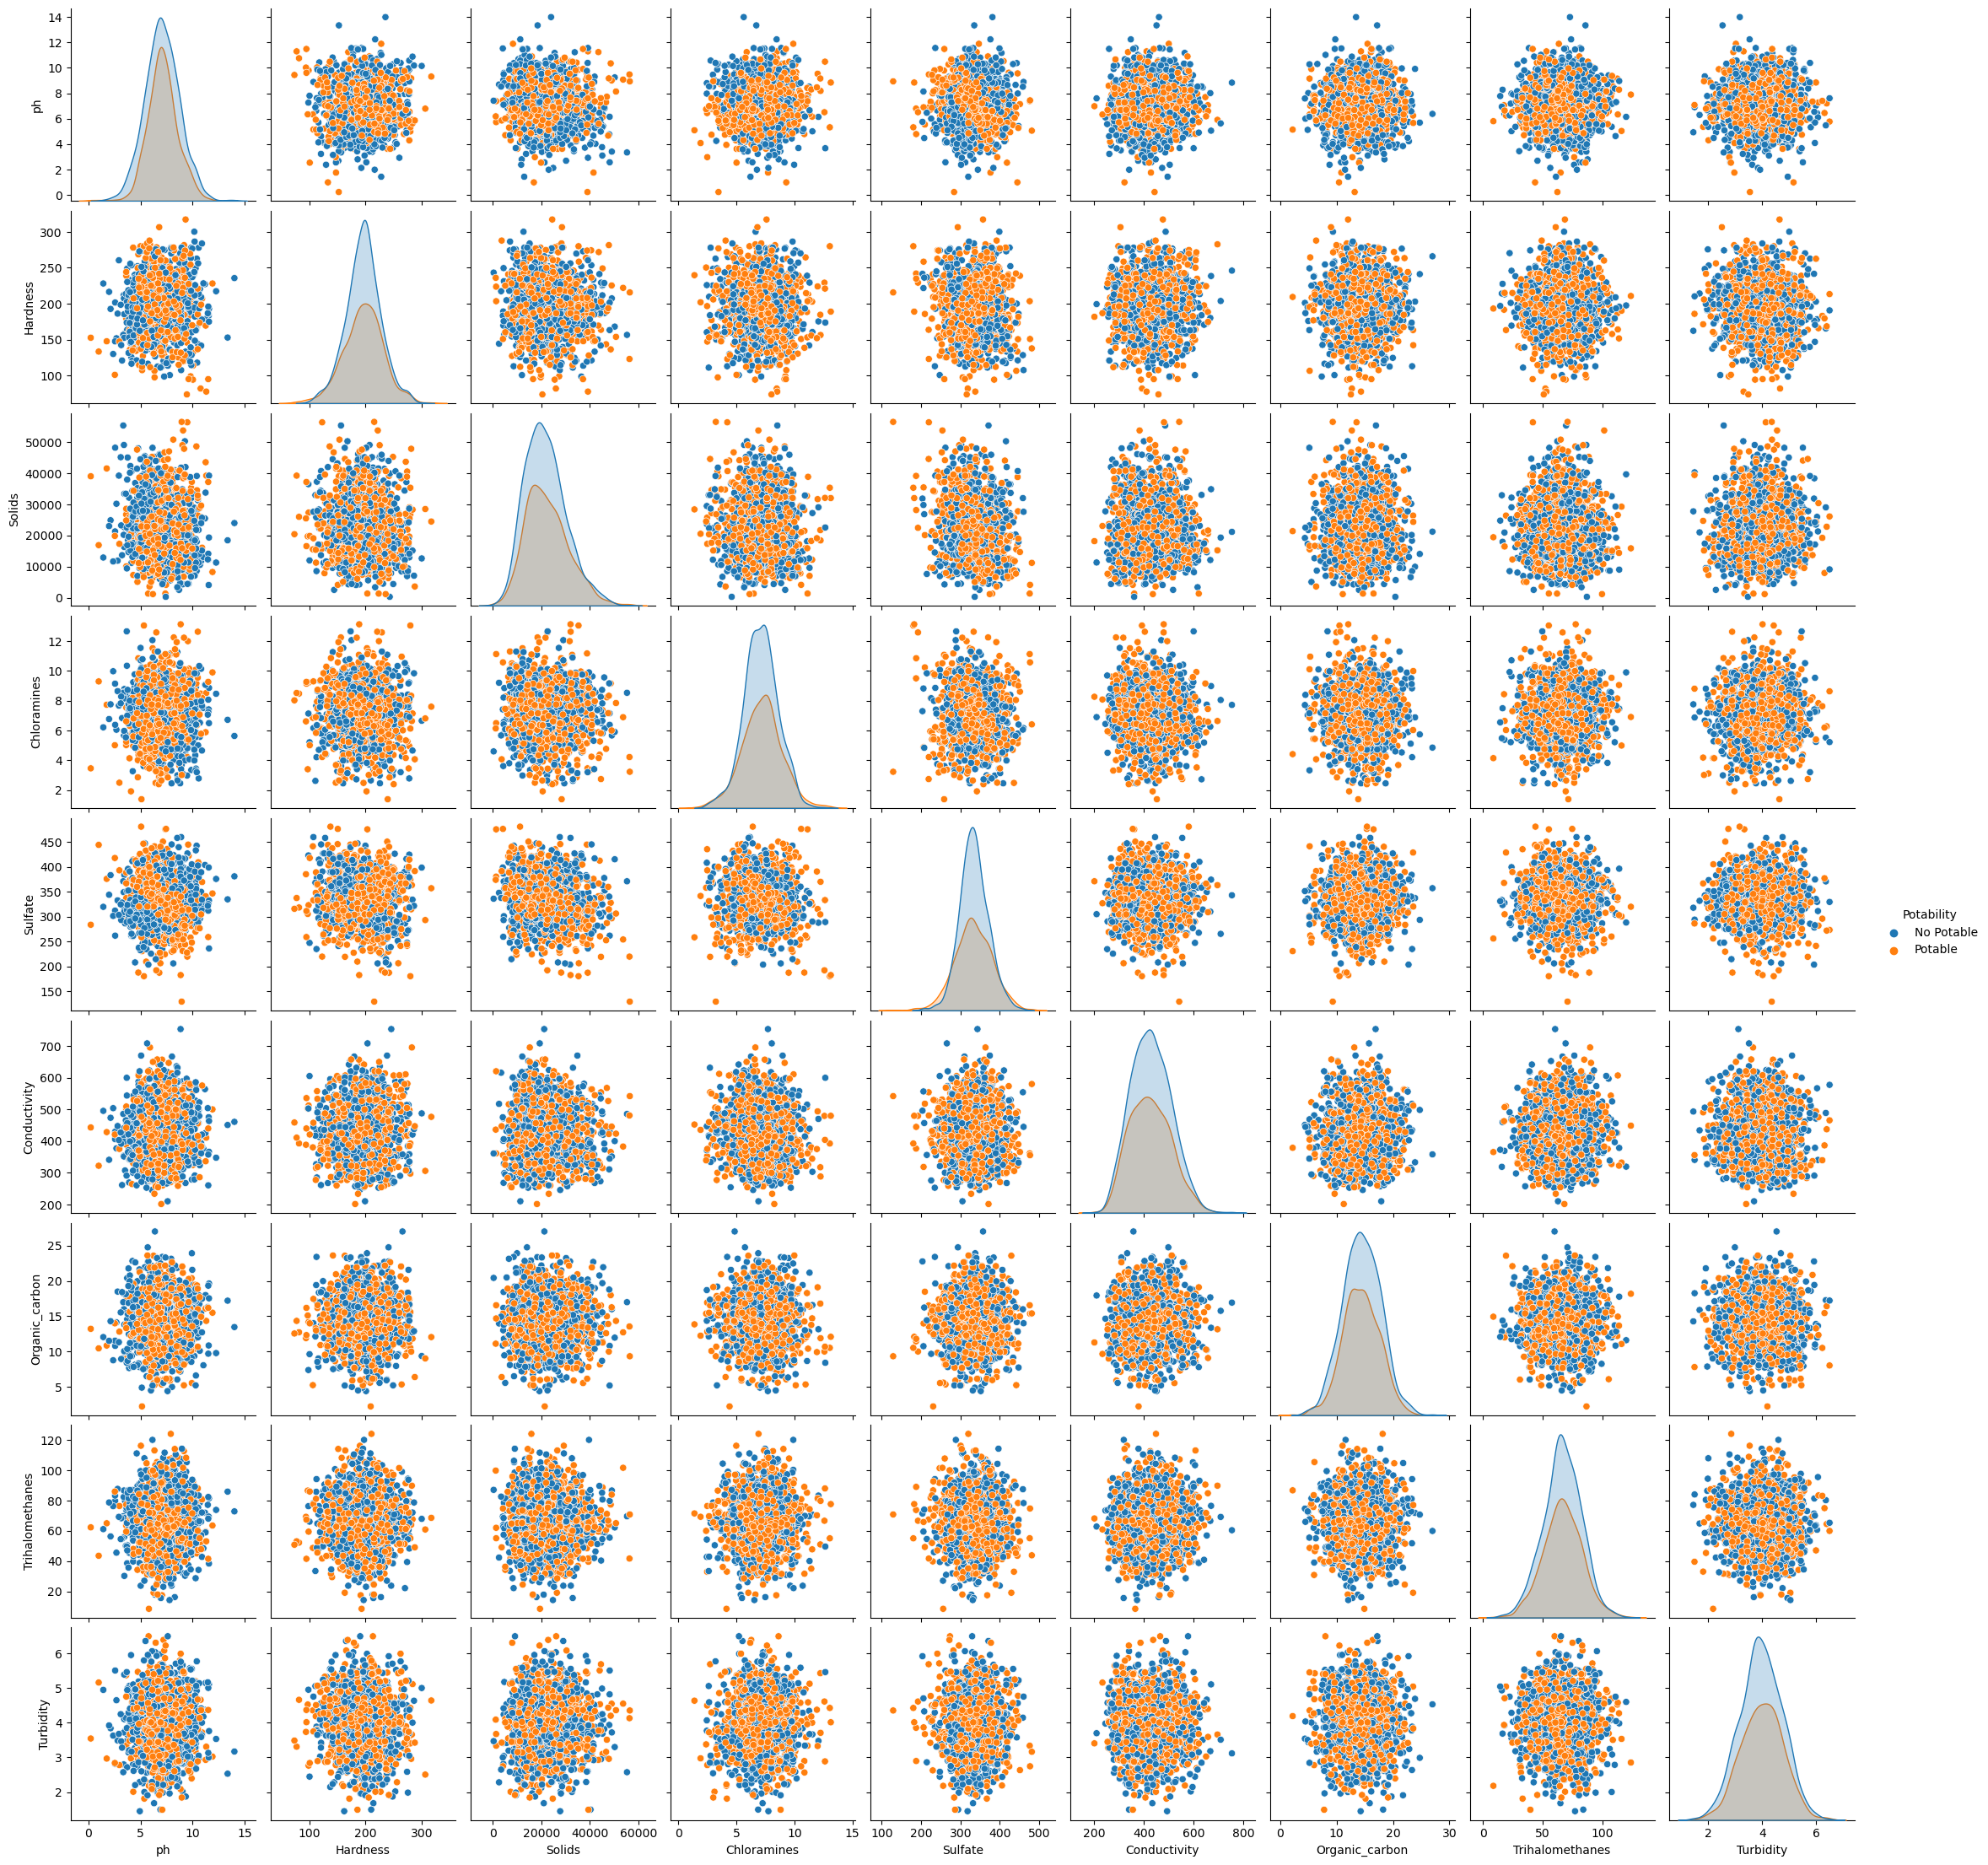

In [13]:
sns.pairplot(df, hue='Potability') 
plt.show()

StatementMeta(mysparkpractica, 4, 15, Finished, Available)

/tmp/ipykernel_8233/1220253864.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


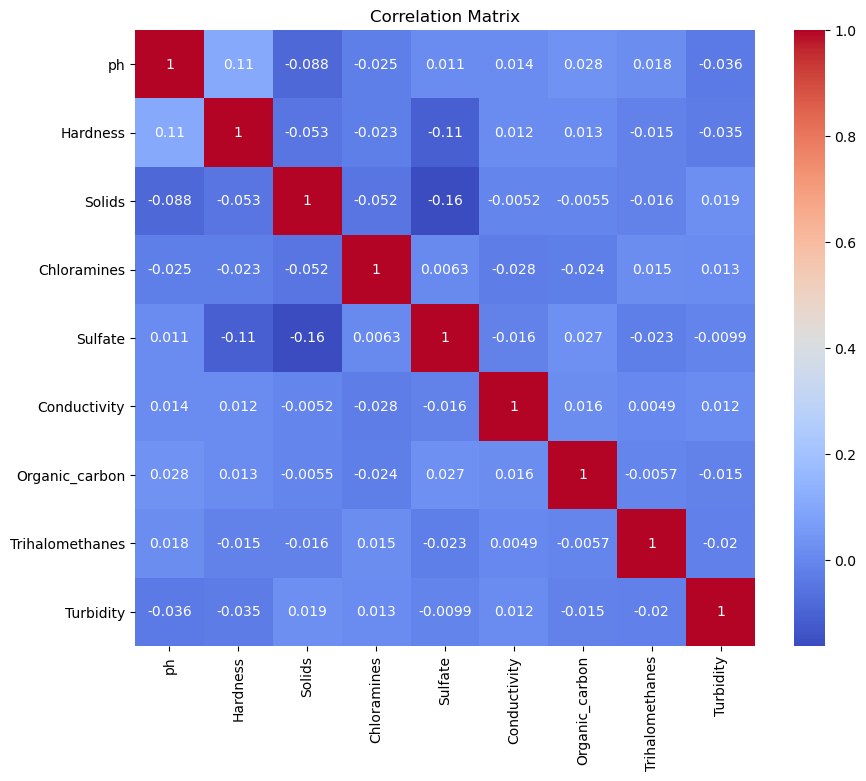

In [14]:
# Analiza la correlación entre las variables.
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Almacenamos el archivo tratado

In [16]:
# Almacenamos los datos limpios del dataframe en un archivo csv en azure.
df.to_csv('abfss://labs@datalakelabs2.dfs.core.windows.net/data/water_potability_clean.csv', index=False)

StatementMeta(mysparkpractica, 4, 17, Finished, Available)